In [41]:
## 해야할 것
## 대표 뉴스포럼을 선정하여 그 뉴스사에서 낸 것들을 데이터 분석화 할 예정
## 

## 오류해결

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import os
sns.set()

In [43]:
## 폰트 설치 필수 한글 다 깨져요~~!!!!
import matplotlib.pyplot as plt
plt.rcParams['font.family']='gulim'

In [44]:
# folder="data"
# subdir_names=os.listdir(folder) 
# #subdir_names에 폴더내의 모든 파일이름이 들어간다
# for file_name in subdir_names:
#     csv=pd.read_csv(folder+"\\"+file_name)

df = pd.read_csv('data/네이버막걸리뉴스.csv')
df_soju = pd.read_csv('data/네이버소주뉴스.csv')

In [53]:
df_soju

,num,yyyymmdd,names,title,text,yyyymm
0,0,2021.01.01.,뉴스엔,손나은 “난 사이코패스였어” 은지원 소주에 소금 투척 제안 후 셀프디스(갬...,"지원 오빠 소주 마시지? 소주에 뭘 타지?""라며 분노를 드러냈다. 이에 손나은은 ""...",2021.01
1,1,2021.01.01.,에너지경제,"식음료 업계 ‘업뉴얼(upgade+renewal)’ 바람···""소비자는 즐겁다""","하이트진로는 최근 진로 미니 팩소주를 유흥용으로 출시하고 배달, 포장용 시장 강화에...",2021.01
2,2,2021.01.01.,스포츠투데이,"'수미네 반찬' 김수미 ""2021년 소의 해, 내가 소띠다"" [텔리뷰]","묵은지 꼬리찜을 만들면서 김수미는 고기 잡내 제거부터 시작했다. 김수미는 ""소꼬리를...",2021.01
3,3,2021.01.01.,뉴시스,식∙음료업계에 부는 '업뉴얼' 바람 '눈길',"하이트진로는 최근 진로 미니 팩소주를 유흥용으로 출시하고 배달, 포장용 시장 강화에...",2021.01
4,4,2021.01.01.,농기자재신문,자연과 인간이 함께하는 세상-남보가 꿈꿉니다.,친환경 농업의 리더 ‘남보’ 주요제품 히까리골드 | 공시-1-3-290 | 히까리골...,2021.01
...,...,...,...,...,...,...
20809,20809,2020.01.01.,스포츠동아,"[TV북마크] ‘블랙독’ 라미란, 센터의 품격…내부고발 소신발언",성순이 하늘에게 소주잔을 먼저 건네며 어느새 이들이 서로 스며들기 시작했음을 보여주...,2020.01
20810,20810,2020.01.01.,매일일보,유통업계 '온라인 시장' 거래 질서 확립도 필요,주류의 경우 주류의 온라인 판매는 국민 편의와 전통주 진흥차원에서 경주교동법주·조옥...,2020.01
20811,20811,2020.01.01.,아이뉴스24,"유통街, 경자년 새해 맞아 관련 상품 출시 봇물",젊은 층을 중심으로 남들과 다른 독창적 아이템을 선호하는 트렌드가 퍼지는 가운데 자...,2020.01
20812,20812,2020.01.01.,헤럴드경제,쉽고 확실한 새해 다이어트? “없어요…술 줄이고 운동하세요”,"소주는 한 잔(45㎖)에 63㎉, 맥주 한 잔(500㎖)은 185㎉, 와인 한 잔(...",2020.01


In [45]:
## 중복값 제거
df = df.drop_duplicates(subset=None,keep='first',inplace=False)


In [46]:
## colums 이름 수정
df.columns=['num','yyyymmdd','names','title','text']
df_soju.columns = ['num','yyyymmdd','names','title','text']



In [47]:
## yyyymmdd에서 yyyy.mm의 데이터를 새로운 컬럼에 추가한다. 
## 월단위로 그룹을 지기 위해
df['yyyymm'] = df['yyyymmdd'].apply(lambda x: x[0:7])
df_soju['yyyymm'] = df_soju['yyyymmdd'].apply(lambda x: x[0:7])


In [54]:
## 그룹화[].agg(카운트)
df_groupby = df.groupby(['yyyymm']).agg('size')
df_soju_groupby = df.groupby(['yyyymm']).agg('size')


In [49]:
## 갯수를 내림차수로 정렬한다 이유!! 뉴스사를 뽑기위해? 대표 뉴스사를 추려서 
# df_groupby.sort_values(by='yyyymm', ascending=False)[:20]

<AxesSubplot:xlabel='yyyymm'>

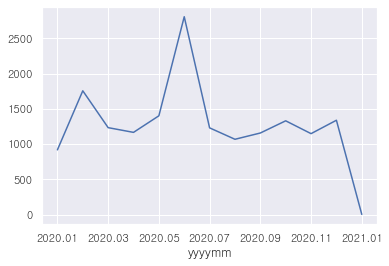

In [57]:
## 그래프 그리기
df_groupby.plot()

<AxesSubplot:xlabel='yyyymm'>

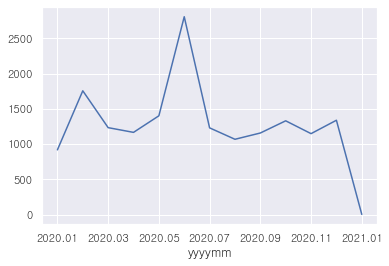

In [56]:
df_soju_groupby.plot()

In [52]:
# 저장
# df.to_csv('네이버뉴스결과피터링.csv', index=False)